In [87]:
!jt -t monokai

In [58]:
import pandas as pd
import seaborn as sn
import numpy as np
import scipy.stats

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV


url = (     "https://archive.ics.uci.edu/ml/machine-learning-databases"
     "/abalone/abalone.data"
 )
abalone = pd.read_csv(url, header=None)

In [59]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [60]:
abalone.columns = [ 
    "Sex",
     "Length",
    "Diameter",
     "Height",
    "Whole weight",
     "Shucked weight",
     "Viscera weight",
     "Shell weight",
     "Rings",
    
]

In [61]:
abalone = abalone.drop("Sex",axis=1)


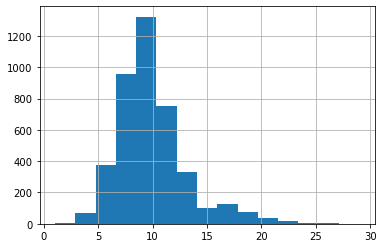

In [62]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [63]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]


Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

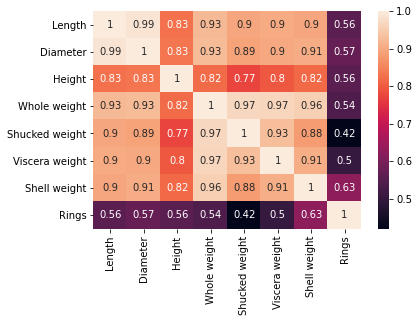

In [64]:
corrMatrix = abalone.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [65]:
X = abalone.drop("Rings", axis=1)
X = X.values
Y = abalone["Rings"]
Y = Y.values

In [66]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
     1.016849,
     0.439051,
    0.222526,
    0.291208,
 ])

In [67]:
distances = np.linalg.norm(X - new_data_point, axis=1)
k=3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

nearest_neighbor_rings = Y[nearest_neighbor_ids]
nearest_neighbor_rings

prediction = nearest_neighbor_rings.mean()

In [68]:
class_neighbors = np.array(["A","B","B","C"])
scipy.stats.mode(class_neighbors)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12345)

In [70]:
knn_model = KNeighborsRegressor(n_neighbors=3)
                            

In [71]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [72]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

1.653705966446084

In [73]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

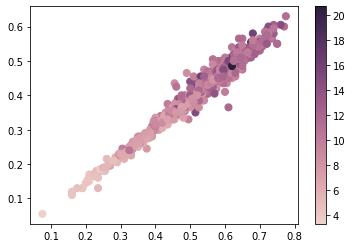

In [74]:
cmap = sn.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

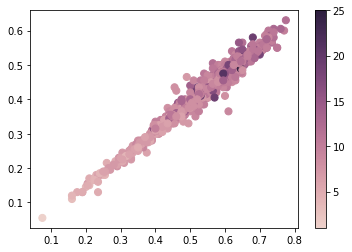

In [75]:
cmap = sn.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [81]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [77]:
gridsearch.best_params_

{'n_neighbors': 25}

In [78]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

2.0731180327543384

In [79]:
test_rmse

2.1700197339962175

In [82]:
parameters = {"n_neighbors": range(1, 50), }
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [83]:
gridsearch.best_params_

{'n_neighbors': 25}

In [85]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1700197339962175